In [1]:
import dgl
import torch
coauthors, _ = dgl.load_graphs(f'../save2/coauthors_topic.graph')
print(coauthors)

Using backend: pytorch


[Graph(num_nodes=36073, num_edges=26296,
      ndata_schemes={'_ID': Scheme(shape=(), dtype=torch.int64)}
      edata_schemes={'_ID': Scheme(shape=(), dtype=torch.int64), 'topic': Scheme(shape=(1000,), dtype=torch.float32)}), Graph(num_nodes=36073, num_edges=31032,
      ndata_schemes={'_ID': Scheme(shape=(), dtype=torch.int64)}
      edata_schemes={'_ID': Scheme(shape=(), dtype=torch.int64), 'topic': Scheme(shape=(1000,), dtype=torch.float32)}), Graph(num_nodes=36073, num_edges=37756,
      ndata_schemes={'_ID': Scheme(shape=(), dtype=torch.int64)}
      edata_schemes={'_ID': Scheme(shape=(), dtype=torch.int64), 'topic': Scheme(shape=(1000,), dtype=torch.float32)}), Graph(num_nodes=36073, num_edges=44444,
      ndata_schemes={'_ID': Scheme(shape=(), dtype=torch.int64)}
      edata_schemes={'_ID': Scheme(shape=(), dtype=torch.int64), 'topic': Scheme(shape=(1000,), dtype=torch.float32)}), Graph(num_nodes=36073, num_edges=54502,
      ndata_schemes={'_ID': Scheme(shape=(), dtype=torch.in

In [15]:
g = coauthors[0]
V = g.number_of_nodes()
E = g.number_of_edges()
out_degree = g.out_degrees() # [v]
in_degree = g.in_degrees()
dmax_in, dmax_out = torch.max(in_degree), torch.max(out_degree)
davg_in, davg_out = torch.mean(in_degree.float()), torch.mean(out_degree.float())
print(f'|V|: {V}, |E|: {E}')
print(f'dmax: in:{dmax_in}, out:{dmax_out}')
print(f'davg: in:{davg_in}, out:{davg_out}')
print(len(in_degree), in_degree)
print(len(out_degree), out_degree)


|V|: 36073, |E|: 26296
dmax: in:20, out:20
davg: in:0.728966236114502, out:0.728966236114502
36073 tensor([2, 4, 5,  ..., 0, 0, 0])
36073 tensor([2, 4, 5,  ..., 0, 0, 0])


In [10]:
print(g.edata)

{'_ID': tensor([    29,     30,    106,  ..., 359153, 359162, 359164]), 'topic': tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])}


In [91]:
import networkx as nx
edge_topic = g.edata['topic']
idx = torch.where(edge_topic.sum(1)!=0)[0]
new_g = dgl.edge_subgraph(g, idx, preserve_nodes=False)
G = dgl.to_networkx(new_g, edge_attrs=['topic'])
G = nx.Graph(G)
# print(nx_g)
# print(nx_g.edges(data=True))
# print(nx_g.nodes(data=True), nx_g.edges(data=True))

In [92]:
import numpy as np
E = G.number_of_edges()
V = G.number_of_nodes()
degree = [d for _, d in G.degree()]
davg = np.mean(degree)
print(V, E, davg)

8957 9628 2.149826950988054


In [93]:
G_temp = nx.path_graph(5)
length = dict(nx.all_pairs_shortest_path_length(G_temp))
print(length)

{0: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4}, 1: {1: 0, 0: 1, 2: 1, 3: 2, 4: 3}, 2: {2: 0, 1: 1, 3: 1, 0: 2, 4: 2}, 3: {3: 0, 2: 1, 4: 1, 1: 2, 0: 3}, 4: {4: 0, 3: 1, 2: 2, 1: 3, 0: 4}}


In [94]:
shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(G))

In [96]:
average_path_lengths = [
    np.mean(list(spl.values())) for spl in shortest_path_lengths.values()
]
# The average over all nodes
apl = np.mean(average_path_lengths)
print('average_path_lengths:', apl)

average_path_lengths: 4.562168123312704


In [97]:
path_lengths = np.zeros(100, dtype=int)
for pls in shortest_path_lengths.values():
    pl, cnts = np.unique(list(pls.values()), return_counts=True)
    path_lengths[pl] += cnts
print(path_lengths)

[  8957  19256  22638  27856  35058  43818  56408  74312  97394 123334
 152308 180768 207224 228394 245114 254818 253370 240852 223432 201440
 176900 153336 129878 108974  90030  73440  57232  45136  35064  27582
  20568  15322  11440   8650   6290   4384   2972   2066   1610   1228
    964    598    238     82     20      4      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0]


In [98]:
idx = np.argmax(path_lengths==0)
path_lengths = path_lengths[:idx]
print(path_lengths)

[  8957  19256  22638  27856  35058  43818  56408  74312  97394 123334
 152308 180768 207224 228394 245114 254818 253370 240852 223432 201440
 176900 153336 129878 108974  90030  73440  57232  45136  35064  27582
  20568  15322  11440   8650   6290   4384   2972   2066   1610   1228
    964    598    238     82     20      4]


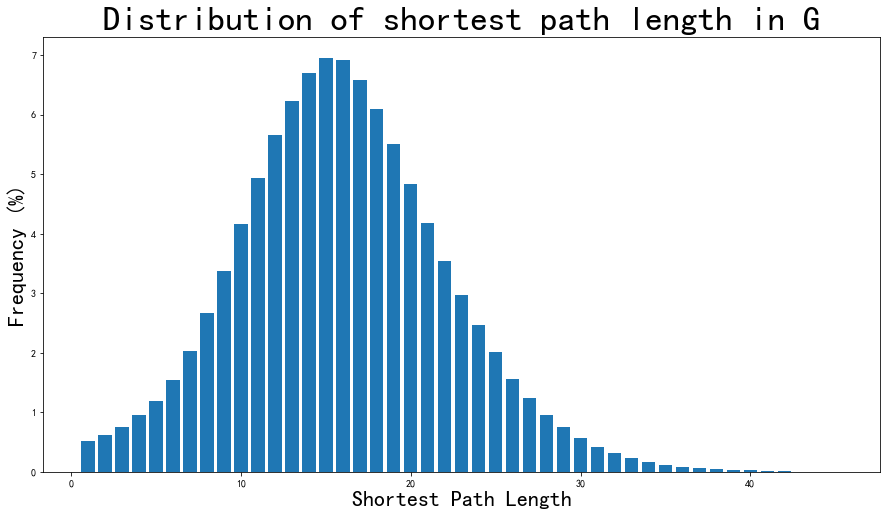

In [61]:
import matplotlib.pyplot as plt
freq_percent = 100 * path_lengths[1:] / path_lengths[1:].sum()

fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(np.arange(1, len(path_lengths)), height=freq_percent)
ax.set_title(
    'Distribution of shortest path length in G', fontdict ={'size': 35}, loc='center'
)
ax.set_xlabel('Shortest Path Length', fontdict ={'size': 22})
ax.set_ylabel('Frequency (%)', fontdict ={'size': 22})
fig.savefig('../jpg/spl.jpg')
# plt.show()

In [64]:
density = nx.density(G)
# ncc = nx.number_connected_components(G)
print(f'density:{density}')

density:0.00024004320578249822


In [101]:
ncc = nx.number_connected_components(G)
print("number_connected_components:", ncc)

number_connected_components: 2053


In [99]:
degree_centrality = nx.centrality.degree_centrality(G)  # save results in a variable to use again 
(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True))[:8] # 此节点连接到其他节点的比例个数

[(3040, 0.001898168825368468),
 (1357, 0.001786511835640911),
 (3086, 0.001786511835640911),
 (696, 0.001674854845913354),
 (3093, 0.001563197856185797),
 (3400, 0.001563197856185797),
 (5490, 0.001563197856185797),
 (484, 0.0014515408664582403)]

In [66]:
(sorted(G.degree, key=lambda item: item[1], reverse=True))[:8]

[(3040, 34),
 (1357, 32),
 (3086, 32),
 (696, 30),
 (3093, 28),
 (3400, 28),
 (5490, 28),
 (484, 26)]

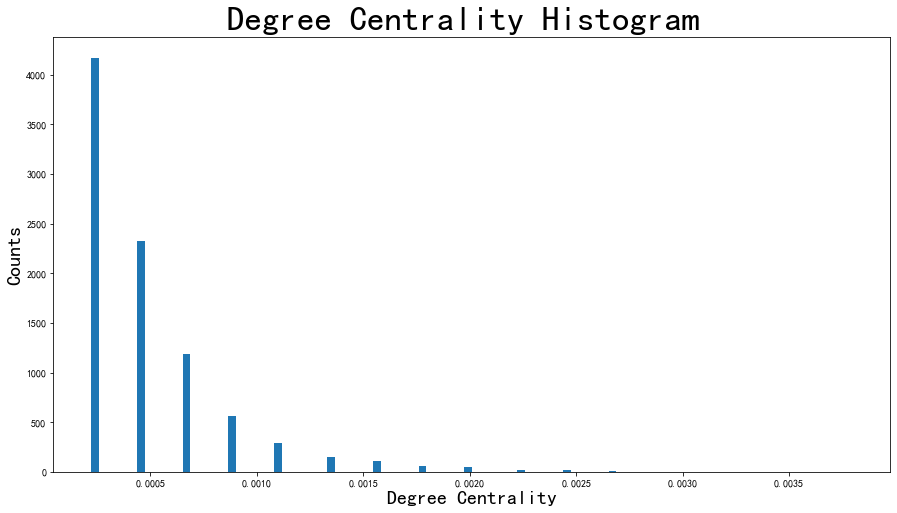

In [68]:
plt.figure(figsize=(15,8))
plt.hist(degree_centrality.values(), bins=100)
# plt.xticks(ticks=[0, 0.00025, 0.0005, 0.001, 0.015, 0.02])  # set the x axis ticks
plt.title('Degree Centrality Histogram ', fontdict ={'size': 35}, loc='center') 
plt.xlabel('Degree Centrality', fontdict ={'size': 20})
plt.ylabel('Counts',fontdict ={'size': 20})
plt.savefig('../jpg/dc.jpg')

In [102]:
betweenness_centrality = nx.centrality.betweenness_centrality(G)  # save results in a variable to use again 
(sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True))[:8]

[(3759, 0.009239890678148252),
 (2207, 0.009039918323912448),
 (484, 0.008719356394311381),
 (1207, 0.00811424763010578),
 (8124, 0.007685829805288649),
 (3065, 0.00756238488148746),
 (6723, 0.007108324017653569),
 (2717, 0.006825836689623251)]

In [73]:
closeness_centrality = nx.centrality.closeness_centrality(G)  # save results in a variable to use again 
(sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True))[:8]

[(484, 0.019474624388576434),
 (3579, 0.01947273282193192),
 (8124, 0.019368323907661106),
 (3759, 0.01930305418526864),
 (854, 0.01924838181251021),
 (3093, 0.019241915804606977),
 (2717, 0.019192180812578986),
 (1980, 0.01911441300168757)]

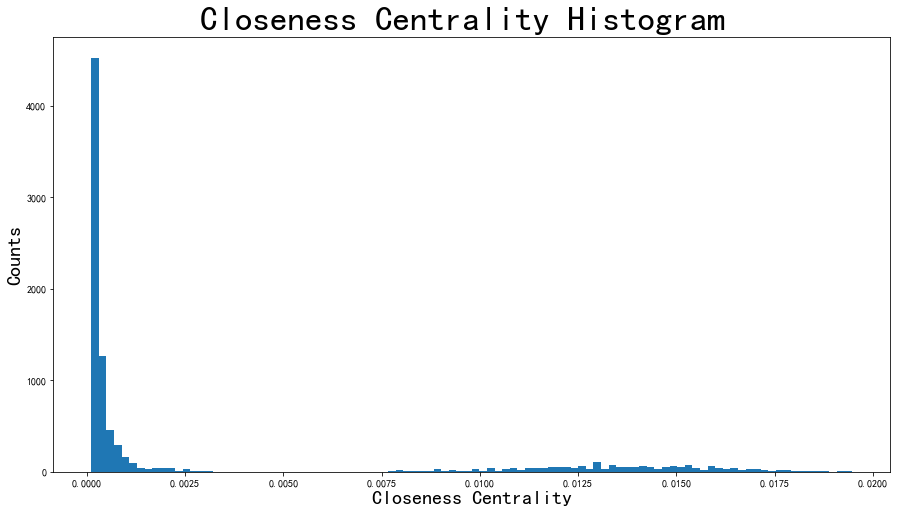

In [74]:
plt.figure(figsize=(15,8))
plt.hist(closeness_centrality.values(), bins=100)
plt.title('Closeness Centrality Histogram ', fontdict ={'size': 35}, loc='center') 
plt.xlabel('Closeness Centrality', fontdict ={'size': 20})
plt.ylabel('Counts',fontdict ={'size': 20})
plt.savefig('../jpg/cc.jpg')

In [103]:
eigenvector_centrality = nx.centrality.eigenvector_centrality(G)  # save results in a variable to use again 
(sorted(eigenvector_centrality.items(), key=lambda item: item[1], reverse=True))[:10]

[(3721, 0.3192691051247114),
 (6455, 0.3189558167850303),
 (4184, 0.31839046429634216),
 (7577, 0.31839046429634216),
 (7034, 0.31145307600562105),
 (7260, 0.31145307600562105),
 (8025, 0.31145307600562105),
 (1977, 0.311453076005621),
 (4508, 0.311453076005621),
 (5699, 0.311453076005621)]

In [106]:
K = nx.clustering(G)
K_avg = nx.average_clustering(G)
(sorted(K.items(), key=lambda item: item[1], reverse=True))[:10]
# print(K, K_avg)

[(0, 1.0),
 (1, 1.0),
 (4, 1.0),
 (7, 1.0),
 (10, 1.0),
 (13, 1.0),
 (15, 1.0),
 (17, 1.0),
 (35, 1.0),
 (36, 1.0)]

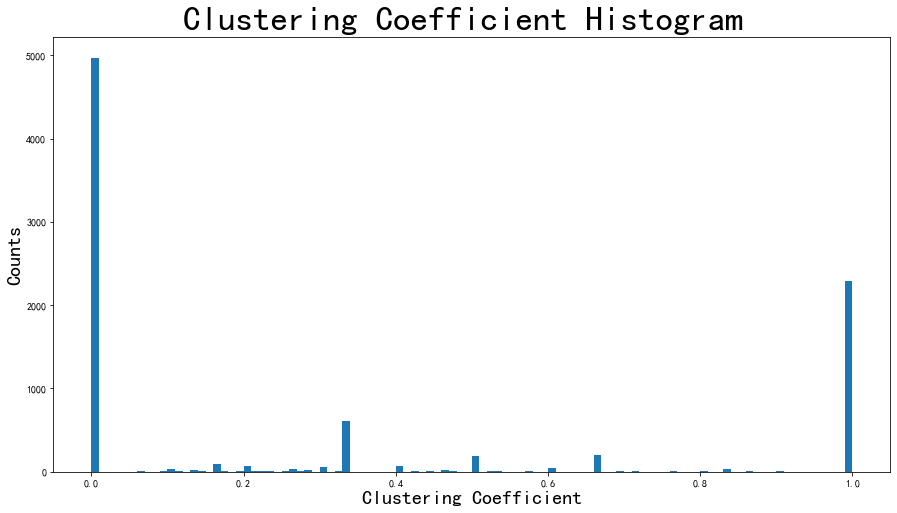

In [108]:
def draw_hist(centrality, path='', title='', bins=100):
    plt.figure(figsize=(15,8))
    plt.hist(centrality.values(), bins=bins)
    plt.title(title + ' Histogram ', fontdict ={'size': 35}, loc='center') 
    plt.xlabel(title, fontdict ={'size': 20})
    plt.ylabel('Counts',fontdict ={'size': 20})
    if path!='':
        plt.savefig(path)
draw_hist(K, path=f'../jpg/K.jpg', title='Clustering Coefficient')

In [110]:
T = nx.triangles(G)
(sorted(T.items(), key=lambda item: item[1], reverse=True))[:10]

[(3721, 37),
 (4184, 37),
 (7577, 37),
 (1977, 36),
 (4508, 36),
 (5699, 36),
 (6455, 36),
 (7034, 36),
 (7260, 36),
 (8025, 36)]

In [133]:
triangles = nx.triangles(G)
T_top8 = (sorted(triangles.items(), key=lambda item: item[1], reverse=True))[:8]
triangles_per_node = list(triangles.values())
T = sum(triangles_per_node) / 3
T_avg = np.mean(triangles_per_node)
T_max = np.max(triangles_per_node)
print(T, T_avg, T_max)

3685.0 1.23423021100815 37


In [115]:
is_bridge = nx.has_bridges(G)
print(is_bridge)

True


In [122]:
bridges = list(nx.bridges(G))
print(len(bridges), bridges[0:10])

3622 [(3, 8797), (5, 7552), (9, 2547), (11, 7993), (12, 1282), (14, 2426), (14, 2838), (16, 420), (18, 7830), (19, 1116)]


In [124]:
local_bridges = list(nx.local_bridges(G, with_span=False))
print(len(local_bridges), local_bridges[0:10])

3723 [(3, 8797), (5, 7552), (9, 2547), (11, 7993), (12, 1282), (14, 2426), (14, 2838), (16, 420), (18, 7830), (19, 1116)]


In [126]:
dac = nx.degree_assortativity_coefficient(G)
dpcc = nx.degree_pearson_correlation_coefficient(G)  # use the potentially faster scipy.stats.pearsonr function.
print(dac, dpcc)

0.3819855058064926 0.38198550580649304


In [127]:
from random import randint
colors = ['' for x in range (G.number_of_nodes())]  # initialize colors list
counter = 0
for com in nx.community.label_propagation_communities(G):
    color = '#%06X' % randint(0, 0xFFFFFF)  # creates random RGB color
    counter += 1
    for node in list(com):  # fill colors list with the particular color for the community nodes
        colors[node] = color
counter

2738

In [130]:
communities = list(nx.community.label_propagation_communities(G))
len(communities)

2738

In [148]:
cliq = nx.cliques_containing_node(G)
print(len(list(cliq)))


8957


In [157]:
max_cliq = list(nx.find_cliques_recursive(G))
# print(max_cliq)
w_lb = min([len(nc) for nc in max_cliq])
w_hb = max([len(nc) for nc in max_cliq])
print(len(max_cliq))
print(w_lb, w_hb)

5311
2 10


In [194]:
kcore = list(nx.k_core(G))
K_max = max(kcore)
print(K_max, kcore)
core_num = nx.core_number(G).values()
print(max(list(core_num)))

8025 [8025, 5699, 3721, 7577, 7260, 6455, 4184, 1977, 7034, 4508]
9


9


In [138]:
def ana():
    return 1, 2, 3
out = []
for i in range(3):
    paras = ana()
    paras = np.array(list(paras))
    out.append(paras)
out = np.array(out)
print(out)

import pandas as pd
df = pd.DataFrame(out)
df.columns = ['V', 'E', 'd_max']
df.index = [str(year) for year in range(2000, 2003)]
print(df)


[[1 2 3]
 [1 2 3]
 [1 2 3]]
      V  E  d_max
2000  1  2      3
2001  1  2      3
2002  1  2      3


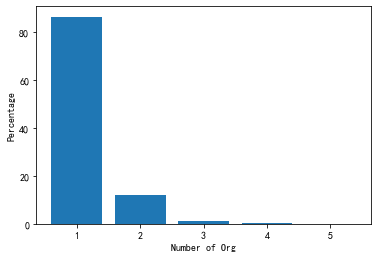

In [166]:
a = [0, 12.08, 1.3, 0.1628, 0.0232]
a[0] = 100-sum(a)
plt.bar(np.arange(len(a))+1, a)
plt.xlabel('Number of Org')
plt.ylabel('Percentage')
plt.savefig('../jpg/org.jpg')